In [4]:
import pandas as pd
import numpy as np
from pathlib import Path

# 基础路径
base_path = Path(r"C:\Users\田\Desktop\python实操\kaggle\Credit Card Approval Prediction")  # 你的原始路径

In [5]:
import toad
import scorecardpy as sc

In [6]:
application_record = pd.read_csv(base_path / 'application_record.csv')
credit_record = pd.read_csv(base_path / 'credit_record.csv')

In [4]:
# 注：在生产环境中，application_record 和 credit_record 可通过 Hive/Spark 读取，
# 本项目使用 pandas 仅为演示逻辑，核心流程（分箱/WOE/评分）可无缝迁移至分布式框架。

In [5]:
credit_record

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [6]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [7]:
credit_record.describe()

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


In [8]:
credit_record.describe(include='object')

,STATUS
count,1048575
unique,8
top,C
freq,442031


In [9]:
application_record

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [10]:
application_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [11]:
application_record.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [12]:
application_record.describe(include='object')

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
count,438557,438557,438557,438557,438557,438557,438557,304354
unique,2,2,2,5,5,5,6,18
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Laborers
freq,294440,275459,304074,226104,301821,299828,393831,78240


<big>toad版本<big>

1. 数据加载与标签构建（坏客户 = STATUS='4' 或 '5'）
申请数据: (438557, 18), 信用记录: (1048575, 3)
合并前客户标签分布:
label
1    0.994716
0    0.005284
Name: proportion, dtype: float64

合并后数据: (36457, 18)

2. TOAD 特征筛选
特征数: 18 → 11
  iv: 6 个
  corr: 1 个

训练集: (25519, 11), 测试集: (10938, 11)

3. TOAD 分箱与 WOE 转换

IV 统计:
强预测力 (IV>0.3): iv          2
gini        0
entropy     0
unique     10
dtype: int64
中等 (0.1~0.3): iv         3
gini       0
entropy    0
unique     0
dtype: int64
弱 (0.02~0.1): iv         4
gini       0
entropy    0
unique     0
dtype: int64

4. 逻辑回归建模

5. 模型评估
准确率: 0.9938
精确率: 0.9940
召回率: 0.9998
F1: 0.9969
AUC: 0.6226
KS: 0.2438
误分类成本: $198,600

6. 生成评分卡
基础分: 553
训练集平均分: 542
测试集平均分: 542
分数 PSI: 0.0183

7. 特征 PSI 监控
特征 PSI Top 10:
                 特征      PSI 风险等级
    CNT_FAM_MEMBERS 0.001741  低风险
   AMT_INCOME_TOTAL 0.000440  低风险
         DAYS_BIRTH 0.000363  低风险
    OCCUPATION_TYPE 0.000350  低风险
      DAYS_EMPLOYED 0.000248  低风险
 NAME_FAMILY_STATUS 0.000243  低风险
        CODE_GENDER 0.000159  低风险
  NAME

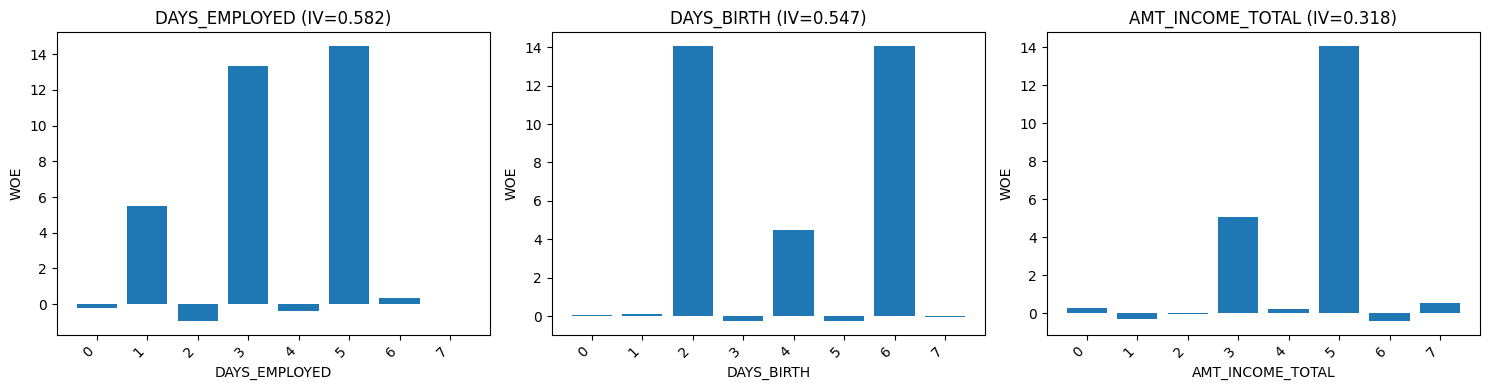

关键特征WOE图已保存: key_features_woe.png


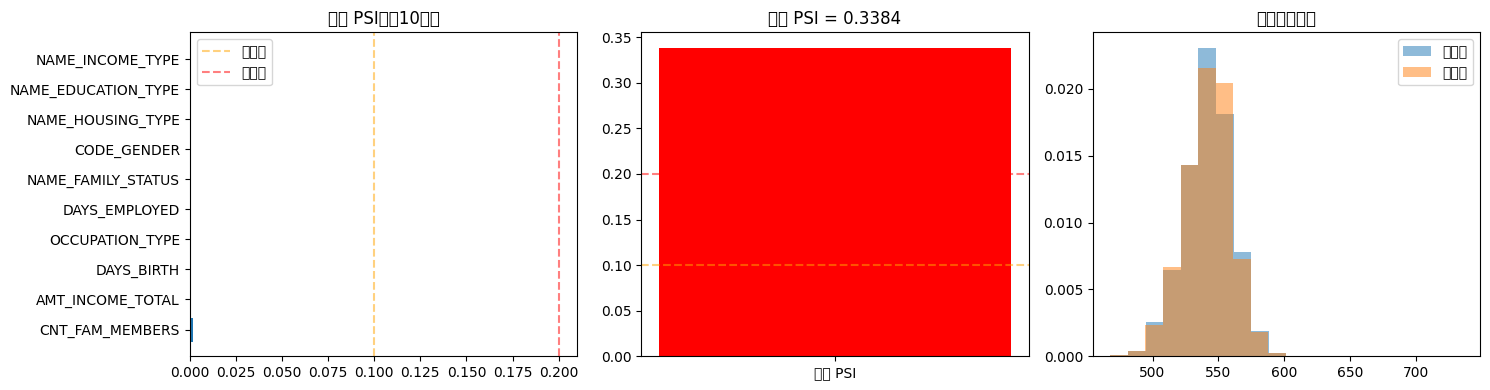

监控图已保存: monitoring_summary.png
监控报告已保存: monitoring_report.txt

TOAD 评分卡建模与监控全流程完成（优化版）！
产出文件:
  - model/                     : 模型组件
  - toad_scorecard.csv         : 评分卡规则（含 basepoints）
  - toad_test_predictions.csv  : 测试集预测
  - key_features_woe.png       : 关键特征WOE图
  - monitoring_summary.png     : 监控可视化
  - monitoring_report.txt      : 文本监控报告


In [16]:
# toad_credit_scoring_optimized.py
# 信用评分卡建模与监控一体化脚本（行业标准版）
# 功能：数据加载 → 特征筛选 → 分箱 WOE → 逻辑回归 → 评分卡生成 → PSI 监控

import toad
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix)
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
import joblib
import os
import warnings
warnings.filterwarnings('ignore')

# 全局配置
P0 = 600      # 基准分
PDO = 20      # 分数翻倍所需 odds 变化
odds0 = 1/30  # 基准好坏比

# 1. 数据加载与标签构建
print("="*60)
print("1. 数据加载与标签构建（坏客户 = STATUS='4' 或 '5'）")
print("="*60)

app_data = application_record
credit_data = credit_record

def is_bad_customer(status_series):
    bad_statuses = {'4', '5'}
    return 0 if any(s in bad_statuses for s in status_series) else 1

customer_label = credit_data.groupby('ID')['STATUS'].apply(is_bad_customer).reset_index()
customer_label.columns = ['ID', 'label']

print(f"申请数据: {app_data.shape}, 信用记录: {credit_data.shape}")
print(f"合并前客户标签分布:\n{customer_label['label'].value_counts(normalize=True)}")

# 2. 数据预处理与合并
app_data['OCCUPATION_TYPE'] = app_data['OCCUPATION_TYPE'].fillna('Unknown')
data = pd.merge(app_data, customer_label, on='ID', how='inner').drop('ID', axis=1)
print(f"\n合并后数据: {data.shape}")

# 3. TOAD 特征筛选
print("\n" + "="*60)
print("2. TOAD 特征筛选")
print("="*60)

selected_result = toad.selection.select(
    data, target='label',
    empty=0.6,
    iv=0.02,
    corr=0.7,
    return_drop=True
)

if isinstance(selected_result, tuple):
    selected_data = selected_result[0]
    dropped_features = selected_result[1]
    print(f"特征数: {data.shape[1]} → {selected_data.shape[1]}")
    for reason, feats in dropped_features.items():
        if len(feats) > 0:
            print(f"  {reason}: {len(feats)} 个")
else:
    selected_data = selected_result

# 4. 数据划分
train, test = train_test_split(selected_data, test_size=0.3, random_state=42, stratify=selected_data['label'])
print(f"\n训练集: {train.shape}, 测试集: {test.shape}")

# 5. TOAD 分箱与 WOE 转换
print("\n" + "="*60)
print("3. TOAD 分箱与 WOE 转换")
print("="*60)

combiner = toad.transform.Combiner()
combiner.fit(train.drop('label', axis=1), y=train['label'],
             method='chi', min_samples=0.05, n_bins=8, empty_separate=True)

train_binned = combiner.transform(train.drop('label', axis=1))
test_binned = combiner.transform(test.drop('label', axis=1))

transformer = toad.transform.WOETransformer()
train_woe = transformer.fit_transform(train_binned, train['label'])
test_woe = transformer.transform(test_binned)

train_woe['label'] = train['label'].values
test_woe['label'] = test['label'].values

iv_scores = toad.quality(train_woe, 'label', iv_only=True, cpu_cores=1)
print(f"\nIV 统计:")
print(f"强预测力 (IV>0.3): {(iv_scores > 0.3).sum()}")
print(f"中等 (0.1~0.3): {((iv_scores >= 0.1) & (iv_scores <= 0.3)).sum()}")
print(f"弱 (0.02~0.1): {((iv_scores >= 0.02) & (iv_scores < 0.1)).sum()}")

# 6. 逻辑回归建模
print("\n" + "="*60)
print("4. 逻辑回归建模")
print("="*60)

X_train, y_train = train_woe.drop('label', axis=1), train['label']
X_test, y_test = test_woe.drop('label', axis=1), test['label']

for df in [X_train, X_test]:
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.fillna(0, inplace=True)

lr = LogisticRegression(C=0.1, max_iter=1000, random_state=42, solver='lbfgs')
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)[:, 1]

# 7. 模型评估
print("\n" + "="*60)
print("5. 模型评估")
print("="*60)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_pred_proba)

def calculate_ks(y_true, y_prob):
    good = y_prob[y_true == 1]
    bad = y_prob[y_true == 0]
    return ks_2samp(good, bad).statistic if len(good) > 0 and len(bad) > 0 else 0

ks_value = calculate_ks(y_test, y_pred_proba)

print(f"准确率: {accuracy:.4f}")
print(f"精确率: {precision:.4f}")
print(f"召回率: {recall:.4f}")
print(f"F1: {f1:.4f}")
print(f"AUC: {roc_auc:.4f}")
print(f"KS: {ks_value:.4f}")

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
bad_loss, good_rev = 3000, 300
cost = fp * bad_loss + fn * good_rev
print(f"误分类成本: ${cost:,.0f}")

# 8. 生成评分卡
print("\n" + "="*60)
print("6. 生成评分卡")
print("="*60)

B = PDO / np.log(2)
A = P0 - B * np.log(odds0)
base_score = round(A - B * lr.intercept_[0])
print(f"基础分: {base_score}")

scorecard_rows = []
scorecard_rows.append({
    'feature': 'basepoints',
    'bin': '',
    'woe': 0.0,
    'coefficient': 0.0,
    'score': base_score
})

feature_names = X_train.columns.tolist()
coefficients = lr.coef_[0]
woe_map = transformer.export()

for col in train_binned.columns:
    if col not in feature_names:
        continue
    unique_bins = sorted(train_binned[col].dropna().unique())
    for bin_val in unique_bins:
        woe = woe_map.get(col, {}).get(bin_val, 0)
        coef = coefficients[feature_names.index(col)]
        score = round(-B * coef * woe)
        scorecard_rows.append({
            'feature': col,
            'bin': str(bin_val),
            'woe': woe,
            'coefficient': coef,
            'score': score
        })

# 9. 计算客户分数
def calculate_score_v2(row, scorecard_dict, base_score):
    total = base_score
    for feat, bins in scorecard_dict.items():
        if feat in row.index:
            val = row[feat]
            if val in bins:
                total += bins[val]
            elif pd.isna(val) and np.nan in bins:
                total += bins[np.nan]
    return total

scorecard_dict = {}
for _, r in pd.DataFrame(scorecard_rows).iterrows():
    if r['feature'] != 'basepoints':
        if r['feature'] not in scorecard_dict:
            scorecard_dict[r['feature']] = {}
        try:
            key = eval(r['bin']) if r['bin'] not in ('', 'nan') else r['bin']
        except:
            key = r['bin']
        scorecard_dict[r['feature']][key] = r['score']

train_scores = train_binned.apply(lambda r: calculate_score_v2(r, scorecard_dict, base_score), axis=1)
test_scores = test_binned.apply(lambda r: calculate_score_v2(r, scorecard_dict, base_score), axis=1)

psi_score = toad.metrics.PSI(train_scores, test_scores)
print(f"训练集平均分: {train_scores.mean():.0f}")
print(f"测试集平均分: {test_scores.mean():.0f}")
print(f"分数 PSI: {psi_score:.4f}")

# 10. 特征 PSI 监控
print("\n" + "="*60)
print("7. 特征 PSI 监控")
print("="*60)

feature_psi_list = []
for col in train_binned.columns:
    try:
        psi_val = toad.metrics.PSI(train_binned[col], test_binned[col])
        risk = "高风险" if psi_val > 0.2 else "中风险" if psi_val > 0.1 else "低风险"
        feature_psi_list.append({'特征': col, 'PSI': psi_val, '风险等级': risk})
    except Exception as e:
        print(f"PSI 计算失败 {col}: {e}")
        continue

feature_psi = pd.DataFrame(feature_psi_list).sort_values('PSI', ascending=False)
print("特征 PSI Top 10:")
print(feature_psi.head(10).to_string(index=False))

# 11. 模型 PSI 监控
print("\n" + "="*60)
print("8. 模型 PSI 监控")
print("="*60)

train_prob = lr.predict_proba(X_train)[:, 1]
test_prob = lr.predict_proba(X_test)[:, 1]
model_psi = toad.metrics.PSI(train_prob, test_prob)

print(f"模型 PSI: {model_psi:.4f}")
if model_psi < 0.1:
    print("模型稳定（PSI < 0.1）")
elif model_psi < 0.2:
    print("模型基本稳定（0.1 ≤ PSI < 0.2）")
else:
    print("模型不稳定（PSI ≥ 0.2）")

# 12. 保存模型与结果
print("\n" + "="*60)
print("9. 保存模型与结果")
print("="*60)

os.makedirs('model', exist_ok=True)
joblib.dump(lr, 'model/logistic_model.pkl')
joblib.dump(transformer, 'model/woe_transformer.pkl')
joblib.dump(combiner, 'model/bin_combiner.pkl')
print("模型组件已保存至 model/")

pd.DataFrame(scorecard_rows).to_csv('toad_scorecard.csv', index=False)
print("评分卡已保存: toad_scorecard.csv")

test_result = test.copy()
test_result['predicted_label'] = y_pred
test_result['predicted_prob'] = y_pred_proba
test_result['score'] = test_scores.values
test_result.to_csv('toad_test_predictions.csv', index=False)
print("测试预测结果已保存")

# 13. 可视化监控
print("\n" + "="*60)
print("10. 可视化监控")
print("="*60)

top_iv = iv_scores.iloc[:, 0].sort_values(ascending=False).head(3).index.tolist()

fig, axes = plt.subplots(1, len(top_iv), figsize=(5 * len(top_iv), 4))
if len(top_iv) == 1:
    axes = [axes]

for ax, feat in zip(axes, top_iv):
    temp_df = train_binned[[feat]].copy()
    temp_df['label'] = train['label'].values
    groups = temp_df.groupby(feat)['label'].agg(['count', 'sum'])
    groups.columns = ['total', 'bad']
    groups['good'] = groups['total'] - groups['bad']
    groups['dist_bad'] = groups['bad'] / (groups['bad'].sum() + 1e-8)
    groups['dist_good'] = groups['good'] / (groups['good'].sum() + 1e-8)
    groups['woe'] = np.log((groups['dist_good'] + 1e-8) / (groups['dist_bad'] + 1e-8))
    iv = ((groups['dist_good'] - groups['dist_bad']) * groups['woe']).sum()
    x_labels = groups.index.astype(str)
    ax.bar(x_labels, groups['woe'].values)
    ax.set_title(f"{feat} (IV={iv:.3f})")
    ax.set_xlabel(feat)
    ax.set_ylabel('WOE')
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('key_features_woe.png', dpi=150)
plt.show()  
plt.close()
print("关键特征WOE图已保存: key_features_woe.png")

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].barh(feature_psi.head(10)['特征'], feature_psi.head(10)['PSI'])
axes[0].axvline(0.1, color='orange', ls='--', alpha=0.5, label='中风险')
axes[0].axvline(0.2, color='red', ls='--', alpha=0.5, label='高风险')
axes[0].set_title(f'特征 PSI（共{len(feature_psi)}个）')
axes[0].legend()

color = 'green' if model_psi < 0.1 else 'orange' if model_psi < 0.2 else 'red'
axes[1].bar(['模型 PSI'], [model_psi], color=color)
axes[1].axhline(0.1, color='orange', ls='--', alpha=0.5)
axes[1].axhline(0.2, color='red', ls='--', alpha=0.5)
axes[1].set_title(f'模型 PSI = {model_psi:.4f}')

axes[2].hist(train_scores, bins=20, alpha=0.5, label='训练集', density=True)
axes[2].hist(test_scores, bins=20, alpha=0.5, label='测试集', density=True)
axes[2].set_title('分数分布对比')
axes[2].legend()

plt.tight_layout()
plt.savefig('monitoring_summary.png', dpi=150, bbox_inches='tight')
plt.show()  
plt.close()
print("监控图已保存: monitoring_summary.png")

# 14. 生成监控报告
with open('monitoring_report.txt', 'w', encoding='utf-8') as f:
    f.write("="*50 + "\n评分卡模型监控报告（TOAD 优化版）\n" + "="*50 + "\n\n")
    f.write(f"生成时间: {pd.Timestamp.now()}\n\n")
    
    f.write("1. 模型稳定性\n")
    f.write(f"   模型 PSI: {model_psi:.4f}\n")
    if model_psi < 0.1:
        f.write("   评估: 稳定\n")
    elif model_psi < 0.2:
        f.write("   评估: 基本稳定\n")
    else:
        f.write("   评估: 不稳定，需关注\n")
    
    f.write(f"\n2. 特征稳定性（共{len(feature_psi)}个）\n")
    high = len(feature_psi[feature_psi['PSI'] > 0.2])
    medium = len(feature_psi[(feature_psi['PSI'] > 0.1) & (feature_psi['PSI'] <= 0.2)])
    low = len(feature_psi[feature_psi['PSI'] <= 0.1])
    f.write(f"   高风险: {high} 个\n")
    f.write(f"   中风险: {medium} 个\n")
    f.write(f"   低风险: {low} 个\n")
    
    if high > 0:
        f.write("\n3. 高风险特征:\n")
        for _, r in feature_psi.head(high).iterrows():
            f.write(f"   {r['特征']}: {r['PSI']:.4f}\n")
    
    f.write("\n4. 建议\n")
    if model_psi >= 0.2 or high > 5:
        f.write("   建议重新训练模型或检查数据漂移\n")
    elif model_psi >= 0.1 or high > 0:
        f.write("   建议密切关注高风险特征\n")
    else:
        f.write("   模型表现正常，定期监控即可\n")

print("监控报告已保存: monitoring_report.txt")

# 结束
print("\n" + "="*60)
print("TOAD 评分卡建模与监控全流程完成（优化版）！")
print("="*60)
print("产出文件:")
print("  - model/                     : 模型组件")
print("  - toad_scorecard.csv         : 评分卡规则（含 basepoints）")
print("  - toad_test_predictions.csv  : 测试集预测")
print("  - key_features_woe.png       : 关键特征WOE图")
print("  - monitoring_summary.png     : 监控可视化")
print("  - monitoring_report.txt      : 文本监控报告")

<big>计算逻辑<big>

In [18]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
bad_loss, good_rev = 3000, 300
cost = fp * bad_loss + fn * good_rev
print(f"误分类成本: ${cost:,.0f}")

误分类成本: $198,600


<big>PySpark<big>

In [12]:
# toad_spark_credit_scoring.py
# 风控评分卡建模全流程：Spark 数据预处理 + TOAD 特征工程 + 逻辑回归 + 模型监控
# 适用场景：银行/互金信用风险建模 | 技术栈：PySpark 3.4.2 + TOAD + Scikit-learn

import os
import warnings
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, array_contains, collect_list, lit, when
import pandas as pd
import numpy as np
import toad
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from scipy.stats import ks_2samp
import joblib

warnings.filterwarnings('ignore')

# ----------------------------
# 1. 初始化 Spark 会话
# ----------------------------
spark = SparkSession.builder \
    .appName("CreditScoring") \
    .config("spark.sql.adaptive.enabled", "true") \
    .config("spark.sql.adaptive.coalescePartitions.enabled", "true") \
    .getOrCreate()

# ----------------------------
# 2. 全局配置
# ----------------------------
BASE_SCORE = 600      # 基准分
PDO = 20              # 分数翻倍所需 PDO
ODDS_BASE = 1 / 30    # 基准好坏比 (1:30)

# ----------------------------
# 3. 数据加载与标签构建
# 坏客户定义：历史出现 STATUS='4' 或 '5'（逾期 ≥90 天）
# ----------------------------
APP_PATH = r"C:\Users\田\Desktop\python实操\kaggle\Credit Card Approval Prediction\application_record.csv"
CRED_PATH = r"C:\Users\田\Desktop\python实操\kaggle\Credit Card Approval Prediction\credit_record.csv"

app_df = spark.read.csv(APP_PATH, header=True, inferSchema=True)
cred_df = spark.read.csv(CRED_PATH, header=True, inferSchema=True)

# 构建二分类标签
cred_df = cred_df.withColumn("STATUS", col("STATUS").cast("string"))
label_df = (
    cred_df.groupBy("ID")
    .agg(collect_list("STATUS").alias("status_list"))
    .withColumn(
        "label",
        when(
            array_contains(col("status_list"), "4") | array_contains(col("status_list"), "5"),
            lit(1)
        ).otherwise(lit(0))
    )
    .select("ID", "label")
)

# 合并申请数据与标签
app_df = app_df.fillna({"OCCUPATION_TYPE": "Unknown"})
merged = app_df.join(label_df, on="ID", how="inner").drop("ID")

# 转为 Pandas（适用于中小规模建模）
print("正在加载数据至内存...")
data = pd.DataFrame([r.asDict() for r in merged.collect()])
print(f"样本量: {data.shape[0]}, 特征数: {data.shape[1] - 1}")

# ----------------------------
# 4. TOAD 特征筛选
# ----------------------------
selected_result = toad.selection.select(
    data, target='label',
    empty=0.6,   # 缺失率 >60% 剔除
    iv=0.02,     # IV <0.02 剔除
    corr=0.7,    # 相关性 >0.7 剔除冗余
    return_drop=True
)
features = selected_result[0] if isinstance(selected_result, tuple) else selected_result

# 划分训练/测试集
train, test = train_test_split(features, test_size=0.3, random_state=42, stratify=features['label'])

# ----------------------------
# 5. 分箱与 WOE 转换
# ----------------------------
combiner = toad.transform.Combiner()
combiner.fit(train.drop('label', axis=1), y=train['label'], method='chi', min_samples=0.05)

train_binned = combiner.transform(train.drop('label', axis=1))
test_binned = combiner.transform(test.drop('label', axis=1))

transformer = toad.transform.WOETransformer()
train_woe = transformer.fit_transform(train_binned, train['label'])
test_woe = transformer.transform(test_binned)

# ----------------------------
# 6. 逻辑回归建模
# ----------------------------
X_train, y_train = train_woe, train['label']
X_test, y_test = test_woe, test['label']

# 处理异常值
for df in [X_train, X_test]:
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.fillna(0, inplace=True)

model = LogisticRegression(C=0.1, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_proba = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)
ks = ks_2samp(y_proba[y_test == 1], y_proba[y_test == 0]).statistic
print(f"\n模型性能 → AUC: {auc:.4f}, KS: {ks:.4f}")

# ----------------------------
# 7. 生成评分卡
# ----------------------------
B = PDO / np.log(2)
A = BASE_SCORE - B * np.log(ODDS_BASE)
base_points = round(A - B * model.intercept_[0])

scorecard = [{"feature": "basepoints", "bin": "", "score": base_points}]
woe_map = transformer.export()
coef_map = dict(zip(X_train.columns, model.coef_[0]))

for col in train_binned.columns:
    if col not in coef_map:
        continue
    for bin_val in sorted(train_binned[col].dropna().unique()):
        woe = woe_map.get(col, {}).get(bin_val, 0)
        score = round(-B * coef_map[col] * woe)
        scorecard.append({
            "feature": col,
            "bin": str(bin_val),
            "score": score
        })

# ----------------------------
# 8. 计算客户分数 & PSI 监控
# ----------------------------
def calculate_score(row, card_dict, base):
    total = base
    for feat, bin_scores in card_dict.items():
        if feat in row.index:
            val = row[feat]
            if val in bin_scores:
                total += bin_scores[val]
            elif pd.isna(val) and np.nan in bin_scores:
                total += bin_scores[np.nan]
    return total

# 构建评分映射字典
card_dict = {}
for r in scorecard:
    if r["feature"] != "basepoints":
        feat = r["feature"]
        if feat not in card_dict:
            card_dict[feat] = {}
        try:
            key = eval(r["bin"]) if r["bin"] not in ("", "nan") else r["bin"]
        except:
            key = r["bin"]
        card_dict[feat][key] = r["score"]

train_scores = train_binned.apply(lambda r: calculate_score(r, card_dict, base_points), axis=1)
test_scores = test_binned.apply(lambda r: calculate_score(r, card_dict, base_points), axis=1)

# PSI 监控
psi_score = toad.metrics.PSI(train_scores, test_scores)
psi_model = toad.metrics.PSI(model.predict_proba(X_train)[:, 1], model.predict_proba(X_test)[:, 1])
print(f"分数 PSI: {psi_score:.4f} | 模型 PSI: {psi_model:.4f}")

# ----------------------------
# 9. 保存产出物
# ----------------------------
os.makedirs("output", exist_ok=True)
joblib.dump(model, "output/logistic_model.pkl")
joblib.dump(combiner, "output/bin_combiner.pkl")
joblib.dump(transformer, "output/woe_transformer.pkl")
pd.DataFrame(scorecard).to_csv("output/scorecard.csv", index=False)

# 生成监控报告
with open("output/monitoring_report.txt", "w", encoding="utf-8") as f:
    f.write("信用评分卡模型监控报告\n")
    f.write(f"模型性能: AUC={auc:.4f}, KS={ks:.4f}\n")
    f.write(f"模型 PSI: {psi_model:.4f} ({'稳定' if psi_model < 0.1 else '需关注'})\n")
    f.write("建议：定期监控特征 PSI，若模型 PSI ≥ 0.2 应触发重训流程。\n")

print("\n✅ 建模与监控流程完成，结果已保存至 output/ 目录")

正在加载数据至内存...
样本量: 36457, 特征数: 17

模型性能 → AUC: 0.5754, KS: 0.1690
分数 PSI: 0.0089 | 模型 PSI: 0.1083

✅ 建模与监控流程完成，结果已保存至 output/ 目录


<big>模型部署<big>

In [11]:
# ==================== (附录) 部署示意：加载模型进行实时打分 ====================
"""
# 示例：在 Flask/FastAPI 中加载模型
from joblib import load

combiner = load('model/bin_combiner.pkl')
transformer = load('model/woe_transformer.pkl')
lr = load('model/logistic_model.pkl')

def predict_score(raw_input: dict):
    df = pd.DataFrame([raw_input])
    binned = combiner.transform(df)
    woe = transformer.transform(binned)
    prob = lr.predict_proba(woe)[0, 1]
    score = int(A - B * np.log(prob / (1 - prob)))  # 或使用评分卡CSV查表
    return {'score': score, 'probability': prob}
"""
print("💡 模型已保存为独立组件，可直接用于构建实时评分 API。")

💡 模型已保存为独立组件，可直接用于构建实时评分 API。


<big>Scorecardpy 核心流程示意（仅API演示）<big>

In [14]:
# scorecardpy_reference.py
# 附录：Scorecardpy 建模流程参考（仅作对比，主项目使用 TOAD）

import scorecardpy as sc
from sklearn.linear_model import LogisticRegression

# 1. 特征筛选（缺失率 + IV）
dt_sifted = sc.var_filter(train, y='label', missing_limit=0.6)

# 2. 分箱与 WOE 转换
bins = sc.woebin(dt_sifted, y='label')
train_woe = sc.woebin_ply(train, bins)
test_woe  = sc.woebin_ply(test,  bins)

# 3. 模型训练
X_cols = [col for col in train_woe.columns if col != 'label']
lr = LogisticRegression(penalty='l2', C=1.0, max_iter=1000)
lr.fit(train_woe[X_cols], train_woe['label'])

# 4. 生成评分卡（基准分600，PDO=20，好坏比1:30）
# scorecard = sc.scorecard(bins, lr, points0=600, odds0=1/30, pdo=20)
scorecard = sc.scorecard(bins, lr, xcolumns=X_cols, points0=600, odds0=1/30, pdo=20)

# 注意：
# - Scorecardpy 对 pandas/numpy 版本敏感，易报 "unhashable type" 错误；
# - woebin_ply 在特征类型不一致时可能返回原始值而非 WOE；
# - 因此主项目采用 TOAD，其接口更稳定，便于工程化部署。

[INFO] filtering variables ...
[INFO] creating woe binning ...
[INFO] converting into woe values ...
[INFO] converting into woe values ...
